# Keras Baseline Engine for VAS Challenge 2019

## Imports

In [1]:
import os
import sys
import glob
import tqdm
import keras
import random
import librosa
import numpy as np
import pandas as pd
import librosa.display
import pickle
import tensorflow as tf
from matplotlib import patches
from matplotlib import pyplot as plt
from multiprocessing import Pool, cpu_count
from sklearn.model_selection import StratifiedKFold
import gc
import cv2 as cv
import scipy

# Local file import
import DftSpectrogram
import Metrics
from keras import backend as K


config = tf.ConfigProto()
config.gpu_options.allow_growth = False
sess = tf.Session(config=config)
tf.logging.set_verbosity(tf.logging.ERROR)

print("Done!")
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


Done!


## Path to train dataset dir

In [26]:
dataset_dir = "/home/ilya/Documents/kaggle/audio/"
train_dataset_dir = os.path.join(dataset_dir, "Training_Data/LA/spoof/small")

!tree {train_dataset_dir} -L 1

/home/ilya/Documents/kaggle/audio/Training_Data/LA/spoof/small
├── A_D_1000265
├── A_D_1000752
├── A_D_1001095
├── A_D_1002130
├── A_D_1002200
├── A_D_1002318_0
├── A_D_1002318_1
├── A_D_1002318_2
├── A_D_1002318_3
├── A_D_1002626
├── A_D_1002910
├── A_D_1003356
├── A_D_1003673
├── A_D_1003797
├── A_D_1004357
├── A_D_1004406
├── A_D_1004678
├── A_D_1004774
├── A_D_1005471
├── A_D_1005592
├── A_D_1005971_0
├── A_D_1005971_1
├── A_D_1006568
├── A_D_1006586_0
├── A_D_1006756
├── A_D_1006800_0
├── A_D_1006800_1
├── A_D_1006800_2
├── A_D_1006800_3
├── A_D_1007033
├── A_D_1007830
├── A_D_1007975
├── A_D_1008673
├── A_D_1008730
├── A_D_1008834
├── A_D_1009810_0
├── A_D_1009810_1
├── A_D_1010123
├── A_D_1010205
├── A_D_1010295
├── A_D_1011190
├── A_D_1011897
├── A_D_1012014_0
├── A_D_1012014_1
├── A_D_1012227
├── A_D_1012999
├── A_D_1013553
├── A_D_1013596
├── A_D_1013783
├── A_D_1013810
├── A_D_1014313
├── A_D_1014431
├── A_D_1014671
├── A_D_1015995
├── A_D_1016296
├── A_D_1016922
├── A_D_101

├── A_D_5604504
├── A_D_5604837
├── A_D_5604871
├── A_D_5605656
├── A_D_5606927
├── A_D_5606948
├── A_D_5607232
├── A_D_5609165
├── A_D_5609423
├── A_D_5609703
├── A_D_5610072
├── A_D_5610125
├── A_D_5610202
├── A_D_5610893
├── A_D_5611362
├── A_D_5611461_0
├── A_D_5611758
├── A_D_5611885_0
├── A_D_5611954
├── A_D_5612664
├── A_D_5612758
├── A_D_5613224
├── A_D_5613254_0
├── A_D_5613500
├── A_D_5613820
├── A_D_5613890
├── A_D_5614245
├── A_D_5614325
├── A_D_5614406
├── A_D_5614734
├── A_D_5615493
├── A_D_5616692
├── A_D_5617123
├── A_D_5617675
├── A_D_5617907
├── A_D_5620308
├── A_D_5620876
├── A_D_5621269
├── A_D_5621483
├── A_D_5621900
├── A_D_5622113
├── A_D_5622630
├── A_D_5623014
├── A_D_5623022
├── A_D_5623293_0
├── A_D_5624531
├── A_D_5624856_0
├── A_D_5625259
├── A_D_5625821
├── A_D_5626492
├── A_D_5626564_0
├── A_D_5626564_1
├── A_D_5626564_2
├── A_D_5627177
├── A_D_5627497
├── A_D_5628839
├── A_D_5629187
├── A_D_5629619
├── A_D_5629651
├── A_D_5629796
├── A_D_5629856
├── A_D_

├── LA_E_1225203
├── LA_E_1225217
├── LA_E_1225236
├── LA_E_1225247
├── LA_E_1225282
├── LA_E_1225295
├── LA_E_1225369
├── LA_E_1225417
├── LA_E_1225857
├── LA_E_1225872
├── LA_E_1225943
├── LA_E_1226026
├── LA_E_1226087
├── LA_E_1226294
├── LA_E_1226312
├── LA_E_1226346
├── LA_E_1226647
├── LA_E_1227212_0
├── LA_E_1227261
├── LA_E_1227387
├── LA_E_1227963
├── LA_E_1227970
├── LA_E_1228272
├── LA_E_1228522
├── LA_E_1228533
├── LA_E_1228899
├── LA_E_1229039_0
├── LA_E_1229426_0
├── LA_E_1229426_1
├── LA_E_1229426_2
├── LA_E_1229454
├── LA_E_1229508
├── LA_E_1229553
├── LA_E_1229727
├── LA_E_1229832
├── LA_E_1229877
├── LA_E_1229890
├── LA_E_1230165
├── LA_E_1230515
├── LA_E_1230545_0
├── LA_E_1230545_1
├── LA_E_1230545_2
├── LA_E_1230641
├── LA_E_1230670
├── LA_E_1230806_0
├── LA_E_1230990
├── LA_E_1231141_0
├── LA_E_1231141_1
├── LA_E_1231549
├── LA_E_1231630
├── LA_E_1231658
├── LA_E_1231663
├── LA_E_1231779
├── LA_E_1231809
├── LA_E_1231912
├── LA_E_1232220
├── LA_E_1232336
├── LA_E_

├── LA_E_3032685_0
├── LA_E_3032685_1
├── LA_E_3032685_2
├── LA_E_3032685_3
├── LA_E_3032685_4
├── LA_E_3032943
├── LA_E_3033002
├── LA_E_3033183
├── LA_E_3033406
├── LA_E_3033420
├── LA_E_3033604
├── LA_E_3033710
├── LA_E_3033851
├── LA_E_3033866
├── LA_E_3034063
├── LA_E_3034195
├── LA_E_3034401
├── LA_E_3034535
├── LA_E_3034663
├── LA_E_3034709
├── LA_E_3034987
├── LA_E_3035024
├── LA_E_3035145_0
├── LA_E_3035145_1
├── LA_E_3035398
├── LA_E_3035732
├── LA_E_3035768
├── LA_E_3035911
├── LA_E_3036052
├── LA_E_3036086
├── LA_E_3036349
├── LA_E_3036598_0
├── LA_E_3036598_1
├── LA_E_3036598_2
├── LA_E_3036598_3
├── LA_E_3036598_4
├── LA_E_3036712
├── LA_E_3036809
├── LA_E_3036899
├── LA_E_3036982
├── LA_E_3036998_0
├── LA_E_3036998_1
├── LA_E_3036998_2
├── LA_E_3037001
├── LA_E_3037102
├── LA_E_3037154
├── LA_E_3037215_0
├── LA_E_3037215_1
├── LA_E_3037379
├── LA_E_3037446
├── LA_E_3037607
├── LA_E_3037674
├── LA_E_3037787
├── LA_E_3037822
├── LA_E_3037849
├── LA_E_3037855
├── LA_E_30378

├── LA_E_4869876
├── LA_E_4869909
├── LA_E_4870093
├── LA_E_4870097_0
├── LA_E_4870097_1
├── LA_E_4870225
├── LA_E_4870529
├── LA_E_4870641
├── LA_E_4870971
├── LA_E_4871236_0
├── LA_E_4871236_1
├── LA_E_4871236_2
├── LA_E_4871236_3
├── LA_E_4871246
├── LA_E_4871345
├── LA_E_4871356
├── LA_E_4871547
├── LA_E_4871614
├── LA_E_4871621
├── LA_E_4871752
├── LA_E_4871769
├── LA_E_4871807
├── LA_E_4872021
├── LA_E_4872594
├── LA_E_4872704
├── LA_E_4872875
├── LA_E_4873045
├── LA_E_4873342
├── LA_E_4873689
├── LA_E_4873817
├── LA_E_4873852
├── LA_E_4874220
├── LA_E_4874339
├── LA_E_4874347
├── LA_E_4874411
├── LA_E_4874578
├── LA_E_4874602
├── LA_E_4874766
├── LA_E_4875308
├── LA_E_4875754_0
├── LA_E_4875754_1
├── LA_E_4875899
├── LA_E_4875941
├── LA_E_4875942
├── LA_E_4875989
├── LA_E_4876043
├── LA_E_4876095
├── LA_E_4876129
├── LA_E_4876191
├── LA_E_4876253
├── LA_E_4876410
├── LA_E_4876421
├── LA_E_4876450
├── LA_E_4876499
├── LA_E_4876599
├── LA_E_4876675_0
├── LA_E_4876679
├── LA_E_4876

├── LA_E_6738807
├── LA_E_6739036
├── LA_E_6739248_0
├── LA_E_6739280_0
├── LA_E_6739280_1
├── LA_E_6739280_2
├── LA_E_6739426
├── LA_E_6739466
├── LA_E_6739529
├── LA_E_6739731
├── LA_E_6739930_0
├── LA_E_6739930_1
├── LA_E_6740023
├── LA_E_6740029
├── LA_E_6740032
├── LA_E_6740120
├── LA_E_6740162
├── LA_E_6740288
├── LA_E_6740401
├── LA_E_6740532
├── LA_E_6741255
├── LA_E_6741285
├── LA_E_6741330
├── LA_E_6741412
├── LA_E_6742039
├── LA_E_6742409
├── LA_E_6742507
├── LA_E_6742514
├── LA_E_6742944
├── LA_E_6743072_0
├── LA_E_6743083
├── LA_E_6743136
├── LA_E_6743205
├── LA_E_6743299
├── LA_E_6743319
├── LA_E_6743528
├── LA_E_6744354
├── LA_E_6744394
├── LA_E_6744458
├── LA_E_6744649
├── LA_E_6744808
├── LA_E_6744890
├── LA_E_6745179
├── LA_E_6745254
├── LA_E_6745258
├── LA_E_6745442
├── LA_E_6745787
├── LA_E_6746097
├── LA_E_6746119
├── LA_E_6746257
├── LA_E_6746470
├── LA_E_6746789
├── LA_E_6747301
├── LA_E_6747374
├── LA_E_6747427
├── LA_E_6747536
├── LA_E_6747587
├── LA_E_6747652


├─�� LA_E_8469145
├── LA_E_8469160
├── LA_E_8469260
├── LA_E_8469323
├── LA_E_8469447
├── LA_E_8469565
├── LA_E_8469633
├── LA_E_8469925
├── LA_E_8470181
├── LA_E_8470493
├── LA_E_8470764
├── LA_E_8470864
├── LA_E_8471184
├── LA_E_8471205_0
├── LA_E_8471205_1
├── LA_E_8471492
├── LA_E_8471515
├── LA_E_8472322
├── LA_E_8472353
├── LA_E_8472411
├── LA_E_8472574_0
├── LA_E_8472574_1
├── LA_E_8472649
├── LA_E_8472726
├── LA_E_8472756
├── LA_E_8472945
├── LA_E_8473170
├── LA_E_8473187
├── LA_E_8473390
├── LA_E_8473647
├── LA_E_8473776
├── LA_E_8473803
├── LA_E_8473848
├── LA_E_8474120
├── LA_E_8474384_0
├── LA_E_8474384_1
├── LA_E_8474384_2
├── LA_E_8474417
├── LA_E_8474513
├── LA_E_8474646
├── LA_E_8474699
├── LA_E_8474722
├── LA_E_8475043
├── LA_E_8475188
├── LA_E_8475212_0
├── LA_E_8475400
├── LA_E_8475495_0
├── LA_E_8475819
├── LA_E_8476224
├── LA_E_8476314
├── LA_E_8476377
├── LA_E_8476437_0
├── LA_E_8476461
├── LA_E_8476692
├── LA_E_8476741
├── LA_E_8476751
├── LA_E_8477003
├── LA_E_8

├── LA_T_1239258
├── LA_T_1239503
├── LA_T_1239658
├── LA_T_1239776
├── LA_T_1240818
├── LA_T_1241073
├── LA_T_1242054
├── LA_T_1242060
├── LA_T_1242632
├── LA_T_1242765
├── LA_T_1242957
├── LA_T_1243390
├── LA_T_1243787
├── LA_T_1244933
├── LA_T_1244987
├── LA_T_1245548
├── LA_T_1245872
├── LA_T_1246012
├── LA_T_1246037
├── LA_T_1246271
├── LA_T_1247353
├── LA_T_1247400
├── LA_T_1247777
├── LA_T_1248605
├── LA_T_1248611
├── LA_T_1249684
├── LA_T_1249715
├── LA_T_1250383
├── LA_T_1250830
├── LA_T_1251062_0
├── LA_T_1251151
├── LA_T_1251373
├── LA_T_1251393_0
├── LA_T_1252180
├── LA_T_1252325
├── LA_T_1252499
├── LA_T_1252644
├── LA_T_1253376
├── LA_T_1253601
├── LA_T_1253691
├── LA_T_1253735
├── LA_T_1254772
├── LA_T_1255177
├── LA_T_1256941
├── LA_T_1257692_0
├── LA_T_1257692_1
├── LA_T_1257953
├── LA_T_1258105
├── LA_T_1258223
├── LA_T_1258435
├── LA_T_1258641
├── LA_T_1259699
├── LA_T_1260082
├── LA_T_1261160
├── LA_T_1261189
├── LA_T_1261933_0
├── LA_T_1262557
├── LA_T_1262714
├── 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## File paths

In [3]:
g_train[1507:]

In [14]:
wav_paths = sorted(glob.glob(os.path.join(train_dataset_dir, '**/*'), recursive=True))
random.shuffle(wav_paths)

human  = sorted(filter(lambda path: "human_small" in path, wav_paths))
spoof = sorted(filter(lambda path: "spoof_small" in path, wav_paths))


print("Train Human: %d" % len(human))
print("Train Spoof: %d" % len(spoof))

Train Human: 15748
Train Spoof: 58341


In [17]:
google_small = sorted(glob.glob(os.path.join(train_dataset_dir, '*'), recursive=True))

In [18]:
len(google_small)

3014

In [24]:
google_LA_human_small = sorted(glob.glob(os.path.join(train_dataset_dir, '*'), recursive=True))

In [27]:
google_LA_spoof_small = sorted(glob.glob(os.path.join(train_dataset_dir, '*'), recursive=True))

In [36]:
len(google_LA_spoof_small)

12849

In [17]:
# human = sorted(glob.glob(os.path.join(train_dataset_dir, 'human_/*'), recursive=True))
# spoof = sorted(glob.glob(os.path.join(train_dataset_dir, 'spoof_/*'), recursive=True))

In [10]:
libr = sorted(glob.glob(os.path.join(train_dataset_dir, '*'), recursive=True))

In [30]:
len(libr)

50452

In [34]:
human += google_small[:1506]
spoof += google_small[1507:]

In [37]:
human += google_LA_human_small
spoof += google_LA_spoof_small

In [38]:
human += libr

In [39]:
random.seed=42
random.shuffle(human)
random.shuffle(spoof)

test_preserved = {'H':human[:8_000],
                 'S':spoof[:18_000]}
train_preserved = {'H':human[8_000:],
                 'S':spoof[18_000:]}

pickle.dump(test_preserved,open('test_preserved_small', 'wb'))
pickle.dump(train_preserved,open('train_preserved_small', 'wb'))

In [5]:
def spec_builder(wav):
    D_1 = librosa.amplitude_to_db(librosa.stft(wav,n_fft=700, hop_length=258),
                                    amin=0.01,ref=np.mean)
    mel_spec_1 = librosa.feature.melspectrogram(S=D_1,power=1,sr=y,n_fft=256)
    return mel_spec_1

In [6]:
plt.imshow(spec_builder(x[:66000]))

NameError: name 'x' is not defined

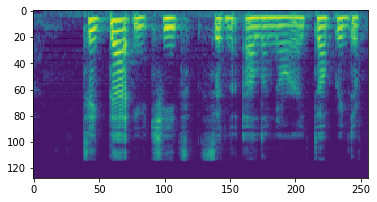

In [77]:
plt.imshow(spec_builder(x[:66000]))

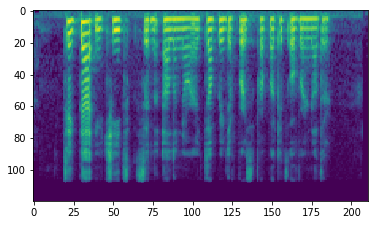

In [48]:
melspec = librosa.feature.melspectrogram(x, n_mels = 120, n_fft=1024)   
logspec = librosa.power_to_db(melspec, ref = np.min)
plt.imshow(logspec)

In [49]:
logspec.shape

(120, 211)

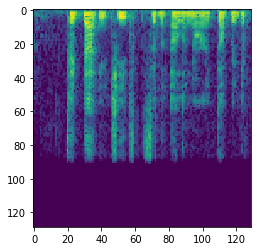

In [74]:
stft = librosa.stft(x[:66000], n_fft=256, hop_length=512)
stft_magnitude, stft_phase = librosa.magphase(stft)
stft_magnitude_db = librosa.amplitude_to_db(stft_magnitude, ref=np.max)

plt.imshow(stft_magnitude_db)

In [33]:
stft_magnitude_db.shape

(129, 129)

In [28]:
y

22050

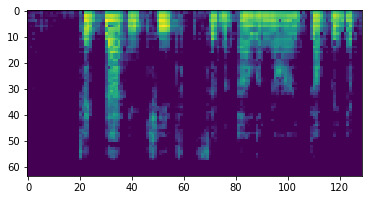

In [99]:
mel_spec = librosa.feature.melspectrogram(x[:66000], n_fft=256, hop_length=512,
                                          n_mels=64, sr=22050, power=1.5)
mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)
plt.imshow(mel_spec_db)

## Train Data Generator

In [12]:
class DataGenerator(keras.utils.Sequence):
    def __init__(self, human_paths, spoof_paths,
                 batch_size=16, amin=0.01,ref=np.mean,n_fft=700):
        self.human_paths = human_paths
        self.spoof_paths = spoof_paths
        self.batch_size = batch_size
        self.n_samples = len(self.human_paths) + len(self.spoof_paths)
        self.on_epoch_end()
        self.n_fft = n_fft
        self.amin = amin
        self.ref = ref
        
    def __len__(self):
        return int(np.floor(self.n_samples / self.batch_size))
    
    def __getitem__(self, index):
        return self.data_generation()
        
    def on_epoch_end(self):
        random.shuffle(self.human_paths)
        random.shuffle(self.spoof_paths)
    
    def data_generation(self):
        wavs, labels = [], []
        while len(wavs) < self.batch_size // 2:
            wav = np.fromfile(random.choice(self.human_paths)).reshape(64,129)
            wav -= wav.min()
            if wav is not None:
                wavs.append(wav)
                labels.append(0)
        while len(wavs) < self.batch_size:
            wav = np.fromfile(random.choice(self.spoof_paths)).reshape(64,129)
            wav -= wav.min()
            if wav is not None:
                wavs.append(wav)
                labels.append(1)

        return np.stack(wavs, 0), keras.utils.to_categorical(np.stack(labels, 0), num_classes=2)

# train_get_feature = lambda path: get_feature(path, length=66000, random_start=True)
train_data_generator = DataGenerator(human, spoof, batch_size=1)
features, labels = train_data_generator[0]
plt.figure(figsize=(14, 3))
plt.imshow(features[0, ...,0])
print(len(train_data_generator))
print(features.shape)
print(labels.shape)

NameError: name 'human' is not defined

In [20]:
mapper_finall = pickle.load(open('mapper_finall', 'rb'))

## Dev Data Generator

260996
(1, 128, 256, 1)
(1, 2)


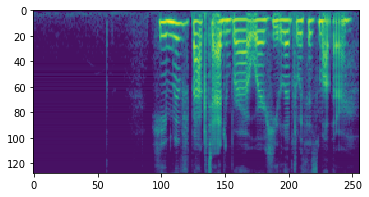

In [66]:
class DevDataGenerator(keras.utils.Sequence):
    def __init__(self, human_paths, spoof_paths,
                 amin=0.01,ref=np.mean,n_fft=700):
        self.human_paths = human_paths
        self.spoof_paths = spoof_paths
        self.paths = human_paths + spoof_paths
        self.labels = [0] * len(human_paths) + [1] * len(spoof_paths)
        self.n_fft = n_fft
        self.amin = amin
        self.ref = ref
        
    def __len__(self):
        return len(self.paths)
    
#     def __spec_builder(self,wav):
#         D_1 = librosa.amplitude_to_db(librosa.stft(wav,n_fft=self.n_fft, hop_length=258),
#                                     amin=self.amin,
#                                     ref=self.ref)
#         mel_spec_1 = librosa.feature.melspectrogram(S=D_1,power=1,sr=16000,n_fft=256)

#         return mel_spec_1
    
    def __getitem__(self, index):
        spec = np.fromfile(self.paths[index]).reshape(1,128,256,1)
        spec -= spec.min()
        return spec, keras.utils.to_categorical([self.labels[index]], num_classes=2)
        
dev_data_generator = DevDataGenerator(mapper_finall['human_big'], mapper_finall['spoof_big'])
features, labels = dev_data_generator[1]
plt.figure(figsize=(14, 3))
plt.imshow(features[0, ...,0])
print(len(dev_data_generator))
print(features.shape)
print(labels.shape)

## Build Model

In [2]:
from keras.models import Sequential, Model
from keras.layers import (Conv2D,MaxPooling2D,Dropout,Dense,BatchNormalization,Input,Flatten, Reshape,
                          AveragePooling2D,Conv1D,Concatenate,Add, GlobalMaxPool2D,Activation,Conv1D,
                          MaxPooling1D,AveragePooling1D,GlobalMaxPooling1D,Bidirectional,CuDNNLSTM,
                         UpSampling2D)
from keras.optimizers import Adam, SGD
from keras.callbacks import LearningRateScheduler

In [5]:
def create_model_1(shape):
    Model_input = Input(shape=shape, name='Inputer')
    conv = Conv2D(60, kernel_size=3, activation='relu', name='Conv1')(Model_input)
    conv = Conv2D(60, kernel_size=3, activation='relu', name='Conv1_1')(conv)
    m_pooling = MaxPooling2D((2,3), name='MaxPooling1')(conv)
    b_n = BatchNormalization(name='BatchNorm1')(m_pooling)
    drop = Dropout(0.2 ,name='Drop1')(b_n)
    conv = Conv2D(60, kernel_size=4, activation='relu', name='Conv2')(drop)
    
#first block
    bl1_1 = Conv2D(20, kernel_size=(1,1), activation='relu', name = 'bl1_1')(conv)
    bl1_2 = Conv2D(20, kernel_size=(3,3), padding='same', activation='relu', name = 'bl1_2')(conv)
    bl1_3 = Conv2D(20, kernel_size=(5,5), padding='same', activation='relu', name = 'bl1_3')(conv)
    blq_4 = Concatenate(3, name='bl1_CONCAT')([bl1_1,bl1_2,bl1_3])
    blq_5 = MaxPooling2D((2,3), name='bl1_MP')(blq_4)
    
    m_pooling = MaxPooling2D((2,3), name='MaxPooling2')(conv)
    conc = Concatenate(3, name='Concatenate')([m_pooling,blq_5])
    b_n = BatchNormalization(name='BatchNorm2')(conc)
    drop = Dropout(0.2 ,name='Drop2')(b_n)
    conv = Conv2D(50, kernel_size=(1,1), activation='relu', name='Conv3')(drop)
    b_n = BatchNormalization(name='BatchNorm3')(conv)
    drop = Dropout(0.3 ,name='Drop3')(b_n)
    m_pooling = MaxPooling2D(3, name='MaxPooling3')(drop)
    conv = Conv2D(50, kernel_size=(3,3), activation='relu', name='Conv4')(m_pooling)
    b_n = BatchNormalization(name='BatchNorm4')(conv)
    drop = Dropout(0.3 ,name='Drop4')(b_n)
    conv = Conv2D(50, kernel_size=(3,3), activation='relu', name='Conv5')(drop)
    b_n = BatchNormalization(name='BatchNorm5')(conv)
    drop = Dropout(0.3 ,name='Drop5')(b_n)
    conv = Conv2D(1, kernel_size=(1,1), activation='relu', name='Conv6')(drop)
    reshape = Reshape((-1,))(conv)
    out_2 = Dense(2, activation='softmax')(reshape)
    model = Model(Model_input, out_2, name="model")

    model.summary()
    return model


model = create_model_1((128, 256,1))

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Inputer (InputLayer)            (None, 128, 256, 1)  0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 126, 254, 60) 600         Inputer[0][0]                    
__________________________________________________________________________________________________
Conv1_1 (Conv2D)                (None, 124, 252, 60) 32460       Conv1[0][0]                      
__________________________________________________________________________________________________
MaxPooling1 (MaxPooling2D)      (None, 62, 84, 60)   0           Conv1_1[0][0]                    
__________________________________________________________________________________________________
BatchNorm1

In [5]:
def create_model_2(shape):
    Model_input = Input(shape=shape, name='Inputer')
    drop = Dropout(0.2 ,name='Drop1')(Model_input)
    conv = Conv2D(60, kernel_size=3, activation='relu', name='Conv1')(Model_input)
    drop = Dropout(0.2 ,name='Drop1')(conv)
    conv = Conv2D(60, kernel_size=3, activation='relu', name='Conv1_1')(conv)
    drop = Dropout(0.2 ,name='Drop1')(conv)
    m_pooling = MaxPooling2D((2,3), name='MaxPooling1')(conv)
    b_n = BatchNormalization(name='BatchNorm1')(m_pooling)
    drop = Dropout(0.2 ,name='Drop1')(b_n)
    conv = Conv2D(60, kernel_size=(4,5), activation='relu', name='Conv2')(drop)
    drop = Dropout(0.2 ,name='Drop1')(conv)
    
#first block
    bl1_1 = Conv2D(20, kernel_size=(1,1), activation='relu', name = 'bl1_1')(conv)
    bl1_2 = Conv2D(20, kernel_size=(3,3), padding='same', activation='relu', name = 'bl1_2')(conv)
    bl1_3 = Conv2D(20, kernel_size=(5,5), padding='same', activation='relu', name = 'bl1_3')(conv)
    blq_4 = Concatenate(3, name='bl1_CONCAT')([bl1_1,bl1_2,bl1_3])
    blq_5 = MaxPooling2D((2,3), name='bl1_MP')(blq_4)
    
    m_pooling = MaxPooling2D((2,3), name='MaxPooling2')(conv)
    conc = Concatenate(3, name='Concatenate')([m_pooling,blq_5])
    b_n = BatchNormalization(name='BatchNorm2')(conc)
    drop = Dropout(0.2 ,name='Drop2')(b_n)
    conv = Conv2D(50, kernel_size=(1,1), activation='relu', name='Conv3')(drop)
    b_n = BatchNormalization(name='BatchNorm3')(conv)
    drop = Dropout(0.2 ,name='Drop3')(b_n)
    m_pooling = MaxPooling2D(2, name='MaxPooling3')(drop)
    conv = Conv2D(50, kernel_size=(3,3), activation='relu', name='Conv4')(m_pooling)
    b_n = BatchNormalization(name='BatchNorm4')(conv)
    drop = Dropout(0.25 ,name='Drop4')(b_n)
    conv = Conv2D(2, kernel_size=(1,1), activation='relu', name='Conv6')(drop)
    drop = Dropout(0.2 ,name='Drop5')(conv)
    r = Reshape((-1,))(drop)
    out = Dense(2, activation='softmax')(r)
    
    model = Model(Model_input, out, name="model")

#     model.summary()
    return model


model = create_model_2((64, 129,1))

In [11]:
def batch_relu(x):
    x = BatchNormalization()(x)    
    x = Activation('relu')(x)
    
    return x

def get_1dconvs_maxpool_freq_deep( shape, kernel_size=2):
    model_input = Input(shape=shape, name='Inputer')
    p=0.4
    x = BatchNormalization()(model_input)
    
    
    x = Conv1D(64,kernel_size,padding='same')(x)
    x = batch_relu(x)
    x = Conv1D(64,kernel_size,padding='same')(x)
    x = batch_relu(x)
    
    x = Dropout(p/2)(x)
    x  = MaxPooling1D(2)(x)   

    x = Conv1D(64,3,padding='same')(x)
    x = batch_relu(x)
    x = Conv1D(64,3,padding='same')(x)
    x = batch_relu(x)

    x = Dropout(p/2)(x)    
    x  = MaxPooling1D(2)(x) 
    

    x = Conv1D(64,3,padding='same')(x)
    x = batch_relu(x)
    x = Conv1D(64,3,padding='same')(x)
    x = batch_relu(x)
    
    x = Dropout(p/2)(x)    
    x  = MaxPooling1D(2)(x) 
    
    
    x = Conv1D(64,3,padding='same')(x)
    x = batch_relu(x)
    x = Conv1D(64,3,padding='same')(x)
    x = batch_relu(x)
    
    x = Dropout(p/2)(x)     
    x  = AveragePooling1D(2)(x) 
    
    
    x_max = GlobalMaxPooling1D()(x)
    x = Dense(32, activation = 'relu')(x_max) #
    x = Dropout(0.3)(x)
    out = Dense(2,activation='softmax')(x)
    model = Model(model_input, out, name="model")
    return model

model = get_1dconvs_maxpool_freq_deep((64,129),5)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Inputer (InputLayer)         (None, 64, 129)           0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 129)           516       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 64, 64)            41344     
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64)            256       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 64, 64)            20544     
_________________________________________________________________
batch_normalization_3 (Batch (None, 64, 64)            256       
__________

## Callbacks

In [6]:
def exp_decay(epoch, k=0.2, initial_rate=0.01):
    return initial_rate * np.exp(-k * (epoch)**1.3)

class Saver(keras.callbacks.Callback):
    def __init__(self, temp_models_dir):
        super().__init__()
        self.temp_models_dir = temp_models_dir
    def on_train_begin(self, logs={}):
        !mkdir -p {self.temp_models_dir}
        !rm {self.temp_models_dir}/*
    def on_epoch_end(self, epoch, logs={}):
        model.save("%s/model_epoch_%d.h5" % (self.temp_models_dir, epoch + 1))        

        
learning_rate   = keras.callbacks.LearningRateScheduler(exp_decay)
saver           = Saver("./temp_models/model_1")
        
callbacks     = [learning_rate, saver]
print("Total %d callbacks" % len(callbacks))

Total 2 callbacks


## Train Model

In [65]:
len(train_preserved['H'])//2

36285

In [66]:
len(train_preserved['S'])//2

81221

In [17]:
dev_data_generator = DevDataGenerator(
    train_preserved['H'][36285:],
    train_preserved['S'][81221:])

In [67]:
train_preserved__copy = train_preserved.copy()

In [77]:
for key in train_preserved__copy:
    for _, i in enumerate(train_preserved__copy[key]):
        try:
            if np.fromfile(i).shape[0] != 8256:
                train_preserved[key].remove(i)
                print('Done')
        except:
            train_preserved[key].remove(i)
            print(i)

In [69]:
test_preserved__copy = test_preserved.copy()

In [70]:
for key in test_preserved__copy:
    for i in test_preserved__copy[key]:
        if np.fromfile(i).shape[0] != 64*129:
            test_preserved[key].remove(i)
            print('Done')

In [71]:
pickle.dump(test_preserved,open('test_preserved_small', 'wb'))
pickle.dump(train_preserved,open('train_preserved_small', 'wb'))

In [7]:
test_preserved = pickle.load(open('test_preserved_small', 'rb'))
train_preserved = pickle.load(open('train_preserved_small', 'rb'))


In [19]:
str_k = StratifiedKFold(n_splits=3,random_state=47)
totall = np.array(train_preserved['H'][:36285]+train_preserved['S'][:81221])
lables = np.array([1 for i in train_preserved['H'][:36285]]+[0 for i in train_preserved['S'][:81221]])

mod = 0
for train_index, test_index in str_k.split(totall,lables):
    
    def exp_decay(epoch, k=0.2, initial_rate=0.01):
        return initial_rate * np.exp(-k * (epoch)**1.3)  

            
    learning_rate   = keras.callbacks.LearningRateScheduler(exp_decay)
        
    mod+=1
    
    if mod==1:
        continue
    
    train_human = totall[train_index[lables[train_index]==1]]
    train_spoof = totall[train_index[lables[train_index]==0]]
    
    saver = Saver("./small/1CNN/model_"+str(mod))
    callbacks = [learning_rate, saver]
    model = get_1dconvs_maxpool_freq_deep((64,129),5)

    
    model.compile(loss="categorical_crossentropy",
                  optimizer=keras.optimizers.Adam(lr=1e-2),
                  metrics=['accuracy'])

    train_data_generator = DataGenerator(train_human, train_spoof, batch_size=16)

    model.fit_generator(train_data_generator,
                    steps_per_epoch = None,
                    epochs = 10,
                    callbacks = callbacks,
                    use_multiprocessing = True,
                    workers = 12,
                    )
        
        
#     def exp_decay(epoch, k=0.2, initial_rate=0.01):
#         return initial_rate * np.exp(-k * (epoch+7)**1.3)  

            
#     learning_rate   = keras.callbacks.LearningRateScheduler(exp_decay)
#     callbacks = [learning_rate, saver]
    
#     model.fit_generator(train_data_generator,
#                     steps_per_epoch = None,
#                     epochs = 3,
#                     validation_data=dev_data_generator,
#                     callbacks = callbacks,
#                     use_multiprocessing = True,
#                     workers = 12,
#                     )
    print(_ ,' Model fitted')

rm: cannot remove './small/1CNN/model_2/*': No such file or directory
Epoch 1/10
4896/4896 [==============================] - 78s 16ms/step - loss: 0.5342 - acc: 0.7230
Epoch 2/10
4896/4896 [==============================] - 71s 15ms/step - loss: 0.4117 - acc: 0.8092
Epoch 3/10
4896/4896 [==============================] - 72s 15ms/step - loss: 0.3375 - acc: 0.8541
Epoch 4/10
4896/4896 [==============================] - 73s 15ms/step - loss: 0.2886 - acc: 0.8810
Epoch 5/10
4896/4896 [==============================] - 73s 15ms/step - loss: 0.2620 - acc: 0.8923
Epoch 6/10
4896/4896 [==============================] - 71s 14ms/step - loss: 0.2429 - acc: 0.9030
Epoch 7/10
Epoch 6/10
4896/4896 [==============================] - 68s 14ms/step - loss: 0.2227 - acc: 0.9111
Epoch 8/10
4896/4896 [==============================] - 71s 15ms/step - loss: 0.2087 - acc: 0.9193
Epoch 9/10
4896/4896 [==============================] - 72s 15ms/step - loss: 0.1968 - acc: 0.9247
Epoch 10/10
4896/4896 [=====

In [23]:
features.shape

(1, 64, 129, 1)

In [5]:
model_1_1 = keras.models.load_model('1CNN_large/model_1/model_epoch.h5')
# model_1_2 = keras.models.load_model('1CNN_large/model_2/model_epoch.h5')
# model_1_3 = keras.models.load_model('1CNN_large/model_3/model_epoch.h5')
# model_1_4 = keras.models.load_model('1CNN_large/model_4/model_epoch.h5')
# model_1_5 = keras.models.load_model('1CNN_large/model_5/model_epoch.h5')

# model_2_1 = keras.models.load_model('2CNN_large/model_1/model_epoch.h5')
# model_2_2 = keras.models.load_model('2CNN_large/model_2/model_epoch.h5')
model_2_3 = keras.models.load_model('2CNN_large/model_3/model_epoch.h5')
# model_2_4 = keras.models.load_model('2CNN_large/model_4/model_epoch.h5')
# model_2_5 = keras.models.load_model('2CNN_large/model_5/model_epoch.h5')

In [4]:
# model_1_1 = keras.models.load_model('small/1CNN/model_1/model_epoch.h5')
# model_1_2 = keras.models.load_model('small/1CNN/model_2/model_epoch.h5')
# model_1_3 = keras.models.load_model('small/1CNN/model_3/model_epoch.h5')
# # model_1_4 = keras.models.load_model('small/1CNN/model_4/model_epoch.h5')
# model_1_5 = keras.models.load_model('small/1CNN/model_5/model_epoch.h5')

model_2_1 = keras.models.load_model('small/2CNN/model_1/model_epoch.h5')
# model_2_2 = keras.models.load_model('small/2CNN/model_2/model_epoch.h5')
# model_2_3 = keras.models.load_model('small/2CNN/model_3/model_epoch.h5')
# model_2_4 = keras.models.load_model('small/2CNN/model_4/model_epoch.h5')
# model_2_5 = keras.models.load_model('small/2CNN/model_5/model_epoch.h5')

In [56]:
model_1_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Inputer (InputLayer)         (None, 128, 256)          0         
_________________________________________________________________
batch_normalization_19 (Batc (None, 128, 256)          1024      
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 128, 64)           81984     
_________________________________________________________________
batch_normalization_20 (Batc (None, 128, 64)           256       
_________________________________________________________________
activation_17 (Activation)   (None, 128, 64)           0         
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 128, 64)           20544     
_________________________________________________________________
batch_normalization_21 (Batc (None, 128, 64)           256       
__________

In [55]:
for i in [model_1_1,model_1_2,model_1_3]:
    i.layers.pop()

In [62]:
model_2_3 = Model(model_2_3.layers[0].input,
          model_2_3.layers[-1].output,
          name= 'model_2_3')

In [28]:
model_1_5 = Model(model_1_5.layers[0].input,
          model_1_5.layers[-1].output,
          name= 'model_1_5')

In [29]:
model_2_1.predict(features.reshape(1,128,256,1))

array([[0.09147549, 1.1291242 , 0.85395443, 2.3025458 , 1.680162  ,
        1.1041911 , 1.6372553 , 1.1355728 , 1.3115252 , 1.3264933 ,
        1.1493568 , 1.253562  , 1.4006916 , 1.2954988 , 1.342876  ,
        1.4935627 , 1.6027833 , 1.8835163 , 1.8227575 , 1.7404957 ,
        1.4448211 , 1.6304731 , 1.7111269 , 1.6942084 , 1.7444882 ]],
      dtype=float32)

In [50]:
def models_uniter(models_list, input_,name):
    return Add(name=name)([i(input_) for i in models_list])

In [51]:
def gen_united_model(shape, CNN1_models,CNN2_models):
    Model_input = Input(shape=shape, name='Inputer')
    
    cnn1_c = models_uniter(CNN1_models, Model_input, '1CNN_concatenator')
    
    reshape = Reshape((128,256,1))(Model_input)
    cnn2_c = models_uniter(CNN2_models, reshape, '2CNN_concatenator')
    out = Add(name='final_concat')([cnn1_c,cnn2_c])
    model = Model(Model_input, out, name="large_concatenated")
    return model

In [61]:
model_2_1.name = 'model_2_1'

In [62]:
model2 = gen_united_model((128,256),
                 [model_1_1,model_1_2,model_1_3,model_1_4,model_1_5],
                 [model_2_1,model_2_2,model_2_3,model_2_4,model_2_5])

In [38]:
from keras.utils import plot_model
plot_model(model2, to_file='model_single_c.png')

In [39]:
model2.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Inputer (InputLayer)            (None, 128, 256)     0                                            
__________________________________________________________________________________________________
reshape_3 (Reshape)             (None, 128, 256, 1)  0           Inputer[0][0]                    
__________________________________________________________________________________________________
model_1_1 (Model)               (None, 2)            181858      Inputer[0][0]                    
__________________________________________________________________________________________________
model_1_2 (Model)               (None, 2)            181858      Inputer[0][0]                    
__________________________________________________________________________________________________
model_1_3 

In [63]:
def models_uniter(models_list, input_,name):
    return Concatenate(1, name=name)([i(input_) for i in models_list])

In [64]:
def gen_united_model(shape, CNN1_models,CNN2_models):
    Model_input = Input(shape=shape, name='Inputer')
    
    cnn1_c = models_uniter(CNN1_models, Model_input, '1CNN_concatenator')
    
    reshape = Reshape((128,256,1))(Model_input)
    cnn2_c = models_uniter(CNN2_models, reshape, '2CNN_concatenator')
    out = Concatenate(1, name='final_concat')([cnn1_c,cnn2_c])
    model = Model(Model_input, out, name="large_concatenated")
    return model

In [65]:
model2 = gen_united_model((128,256),
                 [model_1_1,model_1_2,model_1_3],
                 [model_2_1,model_2_2,model_2_3])

In [33]:
from keras.utils import plot_model
plot_model(model2, to_file='model.png')

In [63]:
model2.predict(features.reshape(1,128,256))

array([[9.990572e+00, 9.428135e-03]], dtype=float32)

In [67]:
model2.save('Large_conc_v2.h5')

In [68]:
model2 = keras.models.load_model('Large_conc_v2.h5')

In [69]:
model2.predict(features.reshape(1,128,256)).shape

(1, 267)

In [89]:
pred_ = model.predict_generator(dev_data_generator)[:,0]

In [60]:
pred__.shape

(12823,)

In [15]:
keras.__version__

'2.2.4'

In [61]:
df.shape

(12856, 2)

In [72]:
df.corr()

small  small_1CNN
small       1.000000    0.894857
small_1CNN  0.894857    1.000000

In [91]:
df.corr()

large  large_1CNN
large       1.000000    0.929896
large_1CNN  0.929896    1.000000

In [ ]:
model.save('ready_models/small_input.h5')

## Load best checkpoint

In [46]:
best_checkpoint = np.argmin(eer.val_eers)
print("Best checkpoint - Epoch %d: EER = %0.3f%%" % (best_checkpoint + 1, eer.val_eers[best_checkpoint]))

model.load_weights("./temp_models/model_epoch_%d.h5" % (best_checkpoint + 1))
print("Done!")

Best checkpoint - Epoch 2: EER = 1.358%
Done!


## Save model

In [48]:
# model.save("./models/baseline_model.h5")
# print("Done!")

## Check single files

In [50]:
print(model.predict(dev_get_feature(random.choice(dev_human))[np.newaxis, ..., np.newaxis])[0][0])
print(model.predict(dev_get_feature(random.choice(dev_spoof))[np.newaxis, ..., np.newaxis])[0][0])

## Run dev generator

In [18]:
results = model.predict_generator(dev_data_generator, verbose=1, steps=None)
print(len(results))
print(results[:5])

10000/10000 [==============================] - 41s 4ms/step
10000
[[9.9996829e-01 3.1705771e-05]
 [1.0000000e+00 2.7587401e-08]
 [9.9997389e-01 2.6144800e-05]
 [9.9999964e-01 4.1709922e-07]
 [9.9998868e-01 1.1340149e-05]]


## Metrics

2021
7979

EER = 0.735 %   @  0.939


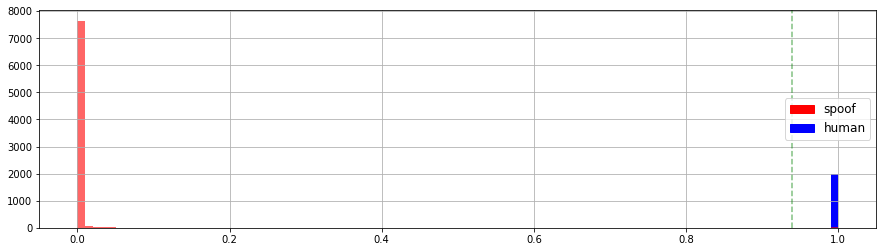

In [22]:
human = results[:len(dev_data_generator.human_paths), 0]
spoof = results[len(dev_data_generator.human_paths):, 0]

print(len(human))
print(len(spoof))

eer, threshold = Metrics.compute_err(human, spoof)

print("\nEER = %0.3f %%   @  %0.3f" % (eer, threshold))

plt.figure(figsize=(15, 4))
plt.hist(human, 99, facecolor='b', alpha=1)
plt.hist(spoof, 99, facecolor='r', alpha=0.6)
red_patch = patches.Patch(color='red', label='spoof')
blue_patch = patches.Patch(color='blue', label='human')
plt.axvline(x=threshold, linestyle='--', color='g', alpha=0.5)
plt.legend(handles=[red_patch, blue_patch], loc=5, fontsize=12)
plt.grid(True)
plt.show()

# Keras Baseline Engine for VAS Challenge 2019

In [3]:
DftSpectrogram

<module 'DftSpectrogram' from '/home/ilya/Documents/kaggle/audio/idrnd_antispoof_Baseline ID R&D/Baseline ID R&D/DftSpectrogram.py'>